In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


In [2]:
def calculate_psd(time_series, sampling_rate, method='fft'):
    """
    Calculate Power Spectral Density of a time series.
    
    Parameters:
    -----------
    time_series : array-like
        Input time series data
    sampling_rate : float
        Sampling rate in Hz
    method : str
        Method to use: 'fft' for periodogram or 'welch' for Welch's method
    
    Returns:
    --------
    frequencies : ndarray
        Frequency values
    psd : ndarray
        Power spectral density values
    """
    if method == 'fft':
        # Using periodogram (direct FFT method)
        frequencies, psd = signal.periodogram(time_series, fs=sampling_rate)
    elif method == 'welch':
        # Using Welch's method (averaged periodograms)
        frequencies, psd = signal.welch(time_series, fs=sampling_rate, 
                                        nperseg=min(256, len(time_series)//4))
    else:
        raise ValueError("Method must be 'fft' or 'welch'")
    
    return frequencies, psd

def plot_psd(frequencies, psd, title='Power Spectral Density'):
    """
    Plot the Power Spectral Density.
    
    Parameters:
    -----------
    frequencies : ndarray
        Frequency values
    psd : ndarray
        Power spectral density values
    title : str
        Plot title
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    
    # Linear scale
    ax1.plot(frequencies, psd, 'b-', linewidth=1)
    ax1.set_xlabel('Frequency (Hz)')
    ax1.set_ylabel('PSD (V²/Hz)')
    ax1.set_title(f'{title} - Linear Scale')
    ax1.grid(True, alpha=0.3)
    
    # Log scale
    ax2.semilogy(frequencies, psd, 'b-', linewidth=1)
    ax2.set_xlabel('Frequency (Hz)')
    ax2.set_ylabel('PSD (V²/Hz)')
    ax2.set_title(f'{title} - Log Scale')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

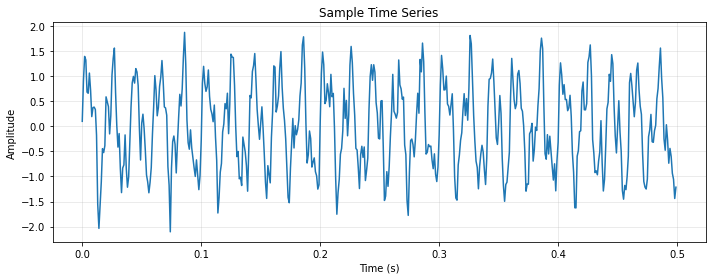

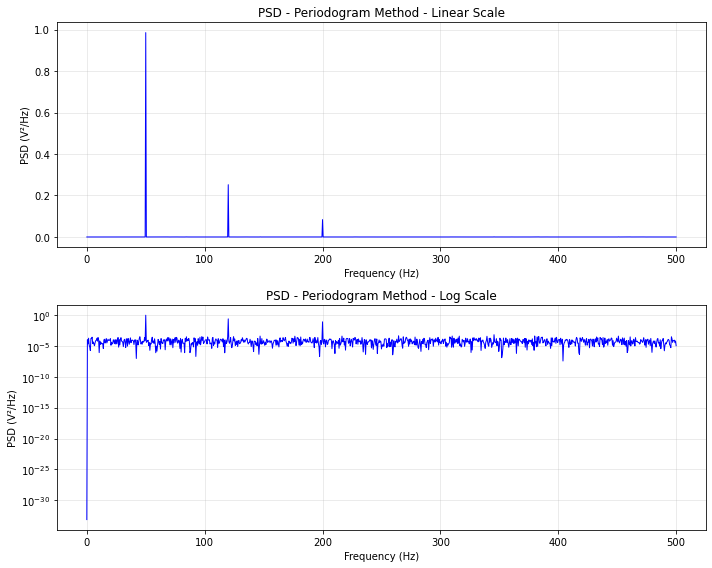

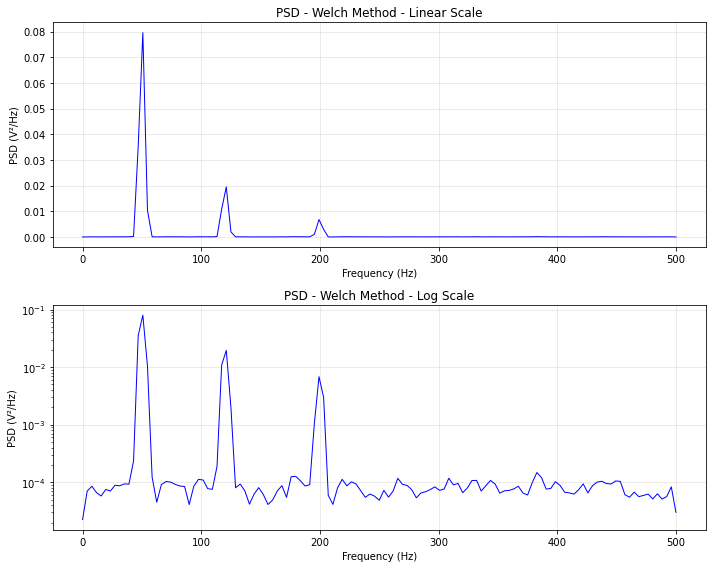


Dominant frequencies detected:
  50.00 Hz: PSD = 9.85e-01
  120.00 Hz: PSD = 2.52e-01


In [3]:
# Example: Generate sample time series with multiple frequency components
np.random.seed(42)

# Parameters
sampling_rate = 1000  # Hz
duration = 2  # seconds
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Create a signal with multiple frequency components + noise
signal_freq1 = 50  # Hz
signal_freq2 = 120  # Hz
signal_freq3 = 200  # Hz

time_series = (np.sin(2 * np.pi * signal_freq1 * t) +
               0.5 * np.sin(2 * np.pi * signal_freq2 * t) +
               0.3 * np.sin(2 * np.pi * signal_freq3 * t) +
               0.2 * np.random.randn(len(t)))  # Add noise

# Plot the original time series
plt.figure(figsize=(10, 4))
plt.plot(t[:500], time_series[:500])  # Plot first 0.5 seconds
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Sample Time Series')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculate and plot PSD using FFT method
frequencies_fft, psd_fft = calculate_psd(time_series, sampling_rate, method='fft')
plot_psd(frequencies_fft, psd_fft, title='PSD - Periodogram Method')

# Calculate and plot PSD using Welch's method
frequencies_welch, psd_welch = calculate_psd(time_series, sampling_rate, method='welch')
plot_psd(frequencies_welch, psd_welch, title='PSD - Welch Method')

# Print dominant frequencies
peak_indices = signal.find_peaks(psd_fft, height=np.max(psd_fft)*0.1)[0]
print("\nDominant frequencies detected:")
for idx in peak_indices[:5]:  # Show top 5 peaks
    print(f"  {frequencies_fft[idx]:.2f} Hz: PSD = {psd_fft[idx]:.2e}")